<a href="https://colab.research.google.com/github/isammartins/viagens_publicas/blob/main/Teste_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
caminho_dados = "/content/drive/MyDrive/Análise de dados/2023_Viagem.csv"  #transferindo dados para o google

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd #Esse comando importa a biblioteca Pandas e dá um apelido pra ela: pd
df_viagens = pd.read_csv(caminho_dados, encoding="windows-1252", sep= ";")
pd.set_option("display.max_columns", None)

```
# pd.read_csv()
```


*  É uma função do Pandas pra ler um arquivo CSV (arquivo de texto com dados separados por delimitadores).
*   Ele importa esse arquivo para um DataFrame, que é uma tabela no Pandas.
```
# encoding="windows-1252"
```
* Diz qual é a codificação dos caracteres do arquivo.
* O windows-1252 é muito comum em arquivos CSV que vieram de: sistemas Windows, planilhas Excel
*Ele garante que letras acentuadas (á, ç, é) e símbolos (R$, %, etc.) sejam lidos corretamente.

```
# sep=";"
```
* Informa que o separador de colunas no CSV é ponto e vírgula (;).
* Em muitos arquivos CSV brasileiros, o separador é ; em vez de , por conta da formatação regional.


```
# pd.set_option("display.max_columns", None)
```
* É um comando que ajusta como o Pandas exibe as tabelas no console.
* Define que, quando você usar print(df_viagens) ou só chamar
* df_viagens, o Pandas vai mostrar todas as colunas, sem cortar nenhuma.
* O padrão do Pandas é ocultar colunas quando a tabela tem muitas, com essa opção ativada (None), ele mostra tudo.


In [ ]:
df_viagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,01/01/2023,02/12/2023,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,0.00,0.00,0.00,0.00
1,18159396,000001/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.000.000-**,Ekaterina Pavlovskaia,NaN,-1,Sem informação,25/02/2023,06/03/2023,Pirenópolis/GO,Segue abaixo cópia da carta-convite enviada à ...,0.00,"7,894.50",0.00,0.00
2,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,NaN,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,16/01/2023,28/02/2024,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,0.00,0.00,0.00,0.00
3,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,NaN,OfSuperior,OfSuperior,10/01/2023,29/01/2023,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,"39,565.70","7,434.13",0.00,"1,095.35"
4,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,05/02/2023,10/02/2023,Vitória/ES,Participação das aulas de Mestrado Interinstit...,"1,013.96",0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830874,2023001618,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.748.269-**,BIANCA VIANA CARDOSO KIVEL,ANALISTA DO BANCO CENTRAL,-1,Sem informação,05/12/2023,06/12/2023,Sem informação,Participar de tratativas nos locais das reuniõ...,606.89,"3,331.29",0.00,0.00
830875,2023001619,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.231.806-**,LUCAS ALVES FREIRE,PROCURADOR DO BANCO CENTRAL,-1,Sem informação,11/12/2023,13/12/2023,Sem informação,Participar da reunião do COPOM .,"1,089.00","1,837.18",0.00,0.00
830876,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,07/12/2023,08/12/2023,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,"4,555.95",0.00,0.00
830877,2023001631,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.407.445-**,NELSON CAMPOS REIS JUNIOR,TECNICO DO BANCO CENTRAL,-1,Sem informação,11/12/2023,11/12/2023,Sem informação,Acompanhamento do Presidente - São Paulo.,319.28,"3,745.53",0.00,400.00


In [ ]:
# Aplica a conversão em cada coluna
df_viagens['Valor passagens'] = df_viagens['Valor passagens'].astype(str).str.replace(',', '.').astype(float)
df_viagens['Valor diárias'] = df_viagens['Valor diárias'].astype(str).str.replace(',', '.').astype(float)
df_viagens['Valor devolução'] = df_viagens['Valor devolução'].astype(str).str.replace(',', '.').astype(float)
df_viagens['Valor outros gastos'] = df_viagens['Valor outros gastos'].astype(str).str.replace(',', '.').astype(float)
df_viagens['Despesas'] = df_viagens['Valor diárias'] + df_viagens['Valor passagens'] + df_viagens['Valor outros gastos']

🔧 O que ele faz:

* str.replace( ',' , '.' ) troca vírgulas por ponto decimal.
* astype(float) converte pra número decimal.

In [ ]:
df_viagens[["Cargo" , 'Valor passagens' , 'Valor diárias' , "Despesas"]]


,Cargo,Valor passagens,Valor diárias,Despesas
0,PROFESSOR DO MAGISTERIO SUPERIOR,0.00,0.00,0.00
1,NaN,"7,894.50",0.00,"7,894.50"
2,BIBLIOTECARIO-DOCUMENTALISTA,0.00,0.00,0.00
3,NaN,"7,434.13","39,565.70","48,095.18"
4,AUXILIAR DE BIBLIIOTECA,0.00,"1,013.96","1,013.96"
...,...,...,...,...
830874,ANALISTA DO BANCO CENTRAL,"3,331.29",606.89,"3,938.18"
830875,PROCURADOR DO BANCO CENTRAL,"1,837.18","1,089.00","2,926.18"
830876,TECNICO DO BANCO CENTRAL,"4,555.95",734.13,"5,290.08"
830877,TECNICO DO BANCO CENTRAL,"3,745.53",319.28,"4,464.81"


In [ ]:
(df_viagens["Cargo"].value_counts(normalize=True) * 100).rename("Proporção de viagens").reset_index()

,Cargo,Proporção de viagens
0,Informações protegidas por sigilo,23.379589
1,PROFESSOR DO MAGISTERIO SUPERIOR,10.829254
2,PROFESSOR ENS BASICO TECN TECNOLOGICO,7.434860
3,CONTRATADO LEI 8745/93 - NI,3.511054
4,AUDITOR FISCAL FEDERAL AGROPECUARIO,3.273786
...,...,...
818,ANALISTA II,0.000197
819,COSTUREIRO,0.000197
820,ANALISTA DE CONTROLE ECON FINANCEIRO SR,0.000197
821,MEDICO I - 36HORAS,0.000197


```
df_viagens["Cargo"].value_counts(normalize=True)
```

* Conta quantas vezes cada valor aparece na coluna "Cargo".

```
normalize=True
```
* Ao invés de mostrar a contagem absoluta, ele retorna a proporção relativa de cada valor, ou seja, quantas vezes aquele valor aparece dividido pelo total de registros. O resultado é uma fração, que vai de 0 a 1.
* Serve para entender percentuais ou proporções, e não apenas a quantidade.
* É útil para análises estatísticas e gráficos, quando você quer trabalhar com frequências relativas.
* Se você multiplicar por 100, como você fez, vira percentual.

```
.rename("Proporção de viagens")
```

* Renomeou a série resultante para "Proporção de viagens". Isso dá um nome para a coluna de valores percentuais que você criou.

```
reset_index()
```
* Ele transforma o índice em uma coluna normal e cria um novo índice numérico sequencial (0, 1, 2, ...)
* Depois você pode renomear essas colunas se quiser, mas esse comando sozinho já organiza os dados como um DataFrame.


In [ ]:
gastos_por_cargo = df_viagens.groupby('Cargo')['Despesas'].sum().reset_index()

O que está acontecendo:
1. df_viagens.groupby('Cargo')
→ Agrupa os dados do dataframe df_viagens por cargo.
Ou seja: ele pega todas as linhas que têm o mesmo cargo e coloca tudo junto.
2. ['Despesas'].sum()
→ Dentro de cada grupo (cargo), ele pega a coluna "Despesas" e soma os valores.
3. .reset_index()
→ Deixa o resultado bonitinho, transformando o índice (Cargo) em uma coluna normal.

* Sem o reset_index() o resultado ficaria com "Cargo" como índice (meio travado).
* Com o reset_index(), ele vira uma tabela comum, fácil de visualizar e trabalhar.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format #código para deixar sem notação científica e apenas com duas casas decimais

In [ ]:
gastos_por_cargo[gastos_por_cargo['Despesas'] > 10_000_000]

,Cargo,Despesas
15,AGENTE ADMINISTRATIVO,15038913.79
72,ANALISTA AMBIENTAL,35397636.03
95,ANALISTA DO SEGURO SOCIAL,15999239.11
113,ANALISTA TRIBUTARIO REC FEDERAL BRASIL,14880976.57
179,ASSISTENTE EM ADMINISTRAçãO,15156945.85
208,AUDITOR FISCAL DO TRABALHO,10376688.67
209,AUDITOR FISCAL FEDERAL AGROPECUARIO,24319379.12
210,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,24406804.29
316,CONTRATADO LEI 8745/93 - NI,17510463.07
386,ESP EM REG DE SERV PUB DE TELECOMUNIC,10037621.59


É um filtro que seleciona somente as linhas do DataFrame gastos_por_cargo onde a coluna 'Despesas' tem valores maiores que 10.000.000.

```
gastos_por_cargo
```

👉 É o DataFrame que você tem, provavelmente algo com informações de cargos e despesas.

```
gastos_por_cargo['Despesas']
```

👉 Acessa a coluna 'Despesas', ou seja, os valores que você quer analisar.

```
gastos_por_cargo['Despesas'] > 10_000_000
```
👉 Cria uma série de valores booleanos (True ou False), indicando quais linhas têm despesas maiores que 10 milhões. A seperação por _ é para ver o número melhor.

In [ ]:
df_viagens["Cargo"].value_counts(dropna=False)

,count
Cargo,
NaN,324279
Informações protegidas por sigilo,118441
PROFESSOR DO MAGISTERIO SUPERIOR,54861
PROFESSOR ENS BASICO TECN TECNOLOGICO,37665
CONTRATADO LEI 8745/93 - NI,17787
...,...
ANALISTA II,1
COSTUREIRO,1
ANALISTA DE CONTROLE ECON FINANCEIRO SR,1


Por padrão, o value_counts() ignora os valores NaN (valores ausentes/nulos).
```
.value_counts(dropna=False)
```

👉 Ele inclui os NaN na contagem!
Ou seja, ele vai te mostrar quantas linhas têm valores ausentes na coluna Cargo.

In [ ]:
df_viagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,01/01/2023,02/12/2023,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,0.00,0.00,0.00,0.00,0.00
1,18159396,000001/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.000.000-**,Ekaterina Pavlovskaia,NaN,-1,Sem informação,25/02/2023,06/03/2023,Pirenópolis/GO,Segue abaixo cópia da carta-convite enviada à ...,0.00,7894.50,0.00,0.00,7894.50
2,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,NaN,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,16/01/2023,28/02/2024,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,0.00,0.00,0.00,0.00,0.00
3,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,NaN,OfSuperior,OfSuperior,10/01/2023,29/01/2023,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,39565.70,7434.13,0.00,1095.35,48095.18
4,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,05/02/2023,10/02/2023,Vitória/ES,Participação das aulas de Mestrado Interinstit...,1013.96,0.00,0.00,0.00,1013.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830874,2023001618,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.748.269-**,BIANCA VIANA CARDOSO KIVEL,ANALISTA DO BANCO CENTRAL,-1,Sem informação,05/12/2023,06/12/2023,Sem informação,Participar de tratativas nos locais das reuniõ...,606.89,3331.29,0.00,0.00,3938.18
830875,2023001619,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.231.806-**,LUCAS ALVES FREIRE,PROCURADOR DO BANCO CENTRAL,-1,Sem informação,11/12/2023,13/12/2023,Sem informação,Participar da reunião do COPOM .,1089.00,1837.18,0.00,0.00,2926.18
830876,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,07/12/2023,08/12/2023,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,4555.95,0.00,0.00,5290.08
830877,2023001631,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.407.445-**,NELSON CAMPOS REIS JUNIOR,TECNICO DO BANCO CENTRAL,-1,Sem informação,11/12/2023,11/12/2023,Sem informação,Acompanhamento do Presidente - São Paulo.,319.28,3745.53,0.00,400.00,4464.81


In [ ]:
df_viagens.dropna(subset='Cargo') #Ele remove as linhas onde a coluna Cargo tem valores nulos (NaN).

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,01/01/2023,02/12/2023,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,0.00,0.00,0.00,0.00,0.00
2,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,NaN,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,16/01/2023,28/02/2024,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,0.00,0.00,0.00,0.00,0.00
4,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,05/02/2023,10/02/2023,Vitória/ES,Participação das aulas de Mestrado Interinstit...,1013.96,0.00,0.00,0.00,1013.96
6,18303291,Informações p,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,30000,Ministério da Justiça e Segurança Pública,30108,Polícia Federal,ID001000345,Informações protegidas por sigilo,Informações protegidas por sigilo,-11,Informações protegidas por sigilo,02/01/2023,01/02/2023,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,9895.35,2553.62,0.00,0.00,12448.97
14,18350498,Informações p,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,30000,Ministério da Justiça e Segurança Pública,30108,Polícia Federal,ID003200185,Informações protegidas por sigilo,Informações protegidas por sigilo,-11,Informações protegidas por sigilo,06/01/2023,03/03/2023,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,18298.51,717.08,0.00,0.00,19015.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830874,2023001618,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.748.269-**,BIANCA VIANA CARDOSO KIVEL,ANALISTA DO BANCO CENTRAL,-1,Sem informação,05/12/2023,06/12/2023,Sem informação,Participar de tratativas nos locais das reuniõ...,606.89,3331.29,0.00,0.00,3938.18
830875,2023001619,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.231.806-**,LUCAS ALVES FREIRE,PROCURADOR DO BANCO CENTRAL,-1,Sem informação,11/12/2023,13/12/2023,Sem informação,Participar da reunião do COPOM .,1089.00,1837.18,0.00,0.00,2926.18
830876,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,07/12/2023,08/12/2023,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,4555.95,0.00,0.00,5290.08
830877,2023001631,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.407.445-**,NELSON CAMPOS REIS JUNIOR,TECNICO DO BANCO CENTRAL,-1,Sem informação,11/12/2023,11/12/2023,Sem informação,Acompanhamento do Presidente - São Paulo.,319.28,3745.53,0.00,400.00,4464.81


In [ ]:
df_viagens["Cargo"] = df_viagens["Cargo"].fillna('NÃO IDENTIFICADO') #Troca a informação NaN por "NÃO IDENTIFICADO" na coluna cargo

In [ ]:
df_viagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,01/01/2023,02/12/2023,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,0.00,0.00,0.00,0.00,0.00
1,18159396,000001/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.000.000-**,Ekaterina Pavlovskaia,NÃO IDENTIFICADO,-1,Sem informação,25/02/2023,06/03/2023,Pirenópolis/GO,Segue abaixo cópia da carta-convite enviada à ...,0.00,7894.50,0.00,0.00,7894.50
2,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,NaN,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,16/01/2023,28/02/2024,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,0.00,0.00,0.00,0.00,0.00
3,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,NÃO IDENTIFICADO,OfSuperior,OfSuperior,10/01/2023,29/01/2023,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,39565.70,7434.13,0.00,1095.35,48095.18
4,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,05/02/2023,10/02/2023,Vitória/ES,Participação das aulas de Mestrado Interinstit...,1013.96,0.00,0.00,0.00,1013.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830874,2023001618,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.748.269-**,BIANCA VIANA CARDOSO KIVEL,ANALISTA DO BANCO CENTRAL,-1,Sem informação,05/12/2023,06/12/2023,Sem informação,Participar de tratativas nos locais das reuniõ...,606.89,3331.29,0.00,0.00,3938.18
830875,2023001619,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.231.806-**,LUCAS ALVES FREIRE,PROCURADOR DO BANCO CENTRAL,-1,Sem informação,11/12/2023,13/12/2023,Sem informação,Participar da reunião do COPOM .,1089.00,1837.18,0.00,0.00,2926.18
830876,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,07/12/2023,08/12/2023,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,4555.95,0.00,0.00,5290.08
830877,2023001631,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.407.445-**,NELSON CAMPOS REIS JUNIOR,TECNICO DO BANCO CENTRAL,-1,Sem informação,11/12/2023,11/12/2023,Sem informação,Acompanhamento do Presidente - São Paulo.,319.28,3745.53,0.00,400.00,4464.81


In [ ]:
df_viagens["Período - Data de início"] = pd.to_datetime(df_viagens["Período - Data de início"], format= "%d/%m/%Y")
df_viagens["Período - Data de fim"] = pd.to_datetime(df_viagens["Período - Data de fim"], format= "%d/%m/%Y")

→ O que está acontecendo:

* Está pegando a coluna "Período - Data de início" do seu dataframe df_viagens.
* *Está convertendo os dados dessa coluna (que estão como texto: ex. "01/01/2023").
* Para o formato de data do pandas (datetime).
* Especificando que o formato da data é: "%d/%m/%Y" → Dia / Mês / Ano.

→ Resultado: Agora o Python enxerga essa coluna como data de verdade.
Assim você pode fazer:

* Contar diferença de dias.
* Filtrar por período.
* Criar gráficos de séries temporais.
* Saber qual dia da semana caiu tal data.




In [ ]:
df_viagens[['Período - Data de início', "Período - Data de fim"]]

,Período - Data de início,Período - Data de fim
0,2023-01-01,2023-12-02
1,2023-02-25,2023-03-06
2,2023-01-16,2024-02-28
3,2023-01-10,2023-01-29
4,2023-02-05,2023-02-10
...,...,...
830874,2023-12-05,2023-12-06
830875,2023-12-11,2023-12-13
830876,2023-12-07,2023-12-08
830877,2023-12-11,2023-12-11


In [ ]:
df_viagens["Período - Data de início"].dt.month_name() #Coloca o nome do mês

,Período - Data de início
0,January
1,February
2,January
3,January
4,February
...,...
830874,December
830875,December
830876,December
830877,December


In [ ]:
df_viagens["Período - Data de fim"] - df_viagens["Período - Data de início"] #Contando o número de dias que durou a viagem

,0
0,335 days
1,9 days
2,408 days
3,19 days
4,5 days
...,...
830874,1 days
830875,2 days
830876,1 days
830877,0 days


In [ ]:
(df_viagens["Período - Data de fim"] - df_viagens["Período - Data de início"]).dt.days #Colocando em números

,0
0,335
1,9
2,408
3,19
4,5
...,...
830874,1
830875,2
830876,1
830877,0


In [ ]:
df_viagens["Dias de Viagem"] = (df_viagens["Período - Data de fim"] - df_viagens["Período - Data de início"]).dt.days

In [ ]:
df_viagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Dias de Viagem
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2023-01-01,2023-12-02,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,"0,00","0,00","0,00","0,00",335
1,18159396,000001/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.000.000-**,Ekaterina Pavlovskaia,NaN,-1,Sem informação,2023-02-25,2023-03-06,Pirenópolis/GO,Segue abaixo cópia da carta-convite enviada à ...,"0,00","7894,50","0,00","0,00",9
2,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,NaN,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,2023-01-16,2024-02-28,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,"0,00","0,00","0,00","0,00",408
3,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,NaN,OfSuperior,OfSuperior,2023-01-10,2023-01-29,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,"39565,70","7434,13","0,00","1095,35",19
4,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,2023-02-05,2023-02-10,Vitória/ES,Participação das aulas de Mestrado Interinstit...,"1013,96","0,00","0,00","0,00",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830874,2023001618,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.748.269-**,BIANCA VIANA CARDOSO KIVEL,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2023-12-05,2023-12-06,Sem informação,Participar de tratativas nos locais das reuniõ...,"606,89","3331,29","0,00","0,00",1
830875,2023001619,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.231.806-**,LUCAS ALVES FREIRE,PROCURADOR DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-13,Sem informação,Participar da reunião do COPOM .,"1089,00","1837,18","0,00","0,00",2
830876,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-07,2023-12-08,Sem informação,Acompanhamento do Presidente do BC - São Paulo,"734,13","4555,95","0,00","0,00",1
830877,2023001631,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.407.445-**,NELSON CAMPOS REIS JUNIOR,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-11,Sem informação,Acompanhamento do Presidente - São Paulo.,"319,28","3745,53","0,00","400,00",0


In [ ]:
(
    df_viagens
    .groupby('Cargo')
    .agg(
        despesa_média= ("Despesas", "mean"),
        duracao_media= ("Dias de Viagem", "mean"),
        despesas_totais= ("Despesas", "sum"),
        destino_mais_frequente= ("Destinos", pd.Series.mode),
        n_viagens= ("Nome", "count")
        )
    .reset_index()
)

,Cargo,despesa_média,duracao_media,despesas_totais,destino_mais_frequente,n_viagens
0,AAD-AUX DE RECURSOS MATERIAIS,3592.100000,9.400000,17960.50,Foz do Iguaçu/PR,5
1,AAD-AUXILIAR ADMINISTRATIVO,115.760714,0.000000,1620.65,Alcantil/PB,14
2,AAD-AUXILIAR DE OPERACOES,7973.394286,16.714286,55813.76,Brasília/DF,7
3,AAD-AUXILIAR DE RECURSOS FINANCEIROS,15545.945000,5.500000,31091.89,"[Paris/França, Rio de Janeiro/RJ]",2
4,AAD-OPERADOR DE MICROCOMPUTADOR,1186.470000,4.000000,1186.47,Petrolina/PE,1
...,...,...,...,...,...,...
818,VICE-PRESIDENTE DA REPUBLICA,7068.200000,1.500000,14136.40,"[Lisboa/Portugal, Quito/Equador]",2
819,VIDREIRO,0.000000,6.000000,0.00,Brasília/DF,1
820,VIGILANTE,693.311453,1.788191,739763.32,Três Rios/RJ,1067
821,VISITADOR SANITARIO,1402.565238,3.880952,58907.74,Guajará-Mirim/RO,42



>  **Parte** → **O que faz** → **Resultado**

---


`.groupby('Cargo')` →  Agrupa os dados por cargo  → Junta todas as viagens de quem tem o mesmo cargo


---

`"Despesas", "mean"` → Calcula a média dos gastos → Quanto, em média, cada cargo gastou por viagem


---
`"Dias de Viagem", "mean"` → Calcula a média de duração das viagens → Quantos dias, em média, o pessoal desse cargo viaja


---

`"Despesas", "sum"` → Soma total dos gastos → Quanto cada cargo gastou no total


---
`"Destinos", pd.Series.mode` → Pega o destino mais frequente → Para onde aquele cargo mais viajou


---
`"Nome", "count"` → Conta quantas viagens foram feitas → Quantidade de viagens daquele cargo








In [ ]:
df_cargos = df_viagens["Cargo"].value_counts(normalize=True).reset_index()
df_cargos

,Cargo,proportion
0,Informações protegidas por sigilo,0.233796
1,PROFESSOR DO MAGISTERIO SUPERIOR,0.108293
2,PROFESSOR ENS BASICO TECN TECNOLOGICO,0.074349
3,CONTRATADO LEI 8745/93 - NI,0.035111
4,AUDITOR FISCAL FEDERAL AGROPECUARIO,0.032738
...,...,...
818,ANALISTA II,0.000002
819,COSTUREIRO,0.000002
820,ANALISTA DE CONTROLE ECON FINANCEIRO SR,0.000002
821,MEDICO I - 36HORAS,0.000002


In [ ]:
df_cargos.loc[df_cargos['proportion'] > 0.01, "Cargo"]

,Cargo
0,Informações protegidas por sigilo
1,PROFESSOR DO MAGISTERIO SUPERIOR
2,PROFESSOR ENS BASICO TECN TECNOLOGICO
3,CONTRATADO LEI 8745/93 - NI
4,AUDITOR FISCAL FEDERAL AGROPECUARIO
5,ANALISTA AMBIENTAL
6,ASSISTENTE EM ADMINISTRAçãO
7,TECNICO INFOR GEOGRAFICAS E ESTATISTICA
8,TECNICO DO SEGURO SOCIAL
9,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL




> **Parte → O que faz → Resultado**


`df_cargos`  → 	É o DataFrame onde estão os dados dos cargos  → 	Imagina uma tabela chamada df_cargos


---

`.loc`[condição, coluna]  → 	Filtra linhas que atendem uma condição e retorna uma coluna específica	 →  Aqui está filtrando as linhas que têm proporção maior que 0.01 e devolvendo só a coluna "Cargo"


---


`df_cargos['proportion'] > 0.01`	 →  Condição para filtrar	→ Ele pega só as linhas onde a proporção é maior que 1% (0.01 = 1%)


---


`"Cargo"` →	Coluna que vai ser mostrada	Só aparece o nome dos cargos

In [ ]:
df_viagens_consolidado= (
    df_viagens
    .groupby('Cargo')
    .agg(
        despesa_média= ("Despesas", "mean"),
        duracao_media= ("Dias de Viagem", "mean"),
        despesas_totais= ("Despesas", "sum"),
        destino_mais_frequente= ("Destinos", pd.Series.mode),
        n_viagens= ("Nome", "count")
        )
    .reset_index()
)

In [ ]:
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, "Cargo"]

In [ ]:
filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)

`df_viagens_consolidado['Cargo']`	→ Seleciona a coluna "Cargo" do dataframe	Coluna com todos os cargos das viagens


---


`.isin(cargos_relevantes)` →	Verifica se o valor está dentro da lista cargos_relevantes	Vai checar: esse cargo está na lista? Sim ou não
O resultado é uma série de True ou False

In [ ]:
df_final = df_viagens_consolidado[filtro]

In [ ]:
df_final["Cargo"] = df_viagens_consolidado['Cargo'].str.title() #Colocanco os nomes dos cargos só com a primeira letra maiúscula

In [ ]:
df_final

,Cargo,despesa_média,duracao_media,despesas_totais,destino_mais_frequente,n_viagens
444,Informações Protegidas Por Sigilo,3176.995612,7.542684,3.762865e+08,Informações protegidas por sigilo,118441
569,Professor Do Magisterio Superior,2031.024696,4.258289,1.114240e+08,Brasília/DF,54861
570,Professor Ens Basico Tecn Tecnologico,1403.465192,2.429736,5.286152e+07,Brasília/DF,37665
316,Contratado Lei 8745/93 - Ni,984.452863,2.839152,1.751046e+07,Bauru/SP,17787
209,Auditor Fiscal Federal Agropecuario,1466.347852,2.059150,2.431938e+07,Brasília/DF,16585
72,Analista Ambiental,2596.467104,5.133940,3.539764e+07,Brasília/DF,13633
179,Assistente Em Administração,1292.703271,2.267804,1.515695e+07,Brasília/DF,11725
777,Tecnico Infor Geograficas E Estatistica,1457.083506,3.192077,1.581664e+07,Brasília/DF,10855
687,Tecnico Do Seguro Social,4304.891028,11.376474,4.600207e+07,Brasília/DF,10686
210,Auditor-Fiscal Da Receita Federal Brasil,2417.951683,2.843273,2.440680e+07,Brasília/DF,10094


In [ ]:
df_final = df_final.sort_values(by="n_viagens", ascending=False)

<Axes: xlabel='Cargo'>

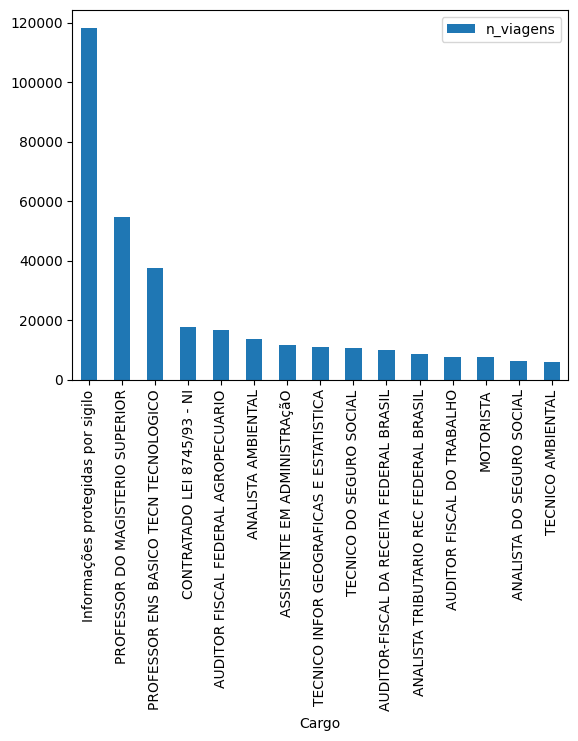

In [ ]:
df_final.plot(x="Cargo", y="n_viagens", kind="bar")

In [ ]:
import matplotlib.pyplot as plt #Importando a biblioteca matplotlib, usada para criação e edição de gráficos

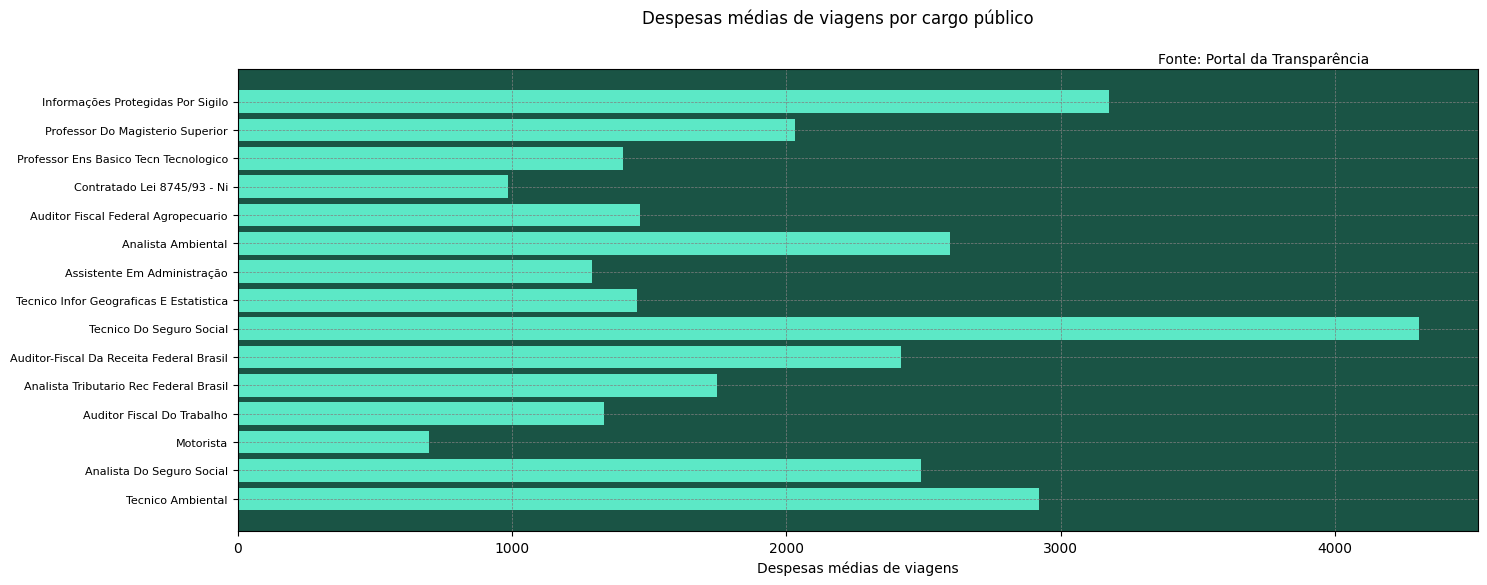

In [ ]:
fig, ax= plt.subplots(figsize=(16, 6))
# Cria a figura (fig) e o eixo (ax) do gráfico.
# figsize=(16, 6) define o tamanho do gráfico (bem largo e mais baixinho).

ax.barh(df_final['Cargo'], df_final["despesa_média"], color= "#5CE8C6")
# Cria um gráfico de barras horizontal (barh)
# Mostra os Cargos no eixo Y e as despesas médias no eixo X
# Cor das barras: verde-água #5CE8C6

ax.invert_yaxis()
# Inverte a ordem dos cargos → O maior valor fica em cima (fica mais visualmente agradável).

ax.set_facecolor("#1A5445")
# Muda a cor de fundo da área do gráfico para verde escuro #1A5445

fig.suptitle("Despesas médias de viagens por cargo público")
# Coloca o título geral do gráfico.

plt.grid(color="gray", linestyle="--", linewidth=0.5)
# Adiciona uma grade (linhas de apoio) no fundo do gráfico. "--" = linha tracejada
# Cor cinza, linha tracejada e fina (0.5).

plt.yticks(fontsize=8)
# Diminui o tamanho das letras dos cargos no eixo Y (pra caber melhor).

plt.figtext(0.70, 0.89, "Fonte: Portal da Transparência")
# Adiciona a fonte dos dados no cantinho do gráfico (posição x=70%, y=89%)

plt.xlabel("Despesas médias de viagens")
# Nomeia o eixo X.

plt.show()
# Mostra o gráfico na tela.

In [ ]:
df_viagens


,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Dias de Viagem
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2023-01-01,2023-12-02,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,0.00,0.00,0.0,0.00,0.00,335
1,18159396,000001/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.000.000-**,Ekaterina Pavlovskaia,NaN,-1,Sem informação,2023-02-25,2023-03-06,Pirenópolis/GO,Segue abaixo cópia da carta-convite enviada à ...,0.00,7894.50,0.0,0.00,7894.50,9
2,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,NaN,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,2023-01-16,2024-02-28,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,0.00,0.00,0.0,0.00,0.00,408
3,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,NaN,OfSuperior,OfSuperior,2023-01-10,2023-01-29,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,39565.70,7434.13,0.0,1095.35,48095.18,19
4,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,2023-02-05,2023-02-10,Vitória/ES,Participação das aulas de Mestrado Interinstit...,1013.96,0.00,0.0,0.00,1013.96,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830874,2023001618,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.748.269-**,BIANCA VIANA CARDOSO KIVEL,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2023-12-05,2023-12-06,Sem informação,Participar de tratativas nos locais das reuniõ...,606.89,3331.29,0.0,0.00,3938.18,1
830875,2023001619,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.231.806-**,LUCAS ALVES FREIRE,PROCURADOR DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-13,Sem informação,Participar da reunião do COPOM .,1089.00,1837.18,0.0,0.00,2926.18,2
830876,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-07,2023-12-08,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,4555.95,0.0,0.00,5290.08,1
830877,2023001631,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.407.445-**,NELSON CAMPOS REIS JUNIOR,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-11,Sem informação,Acompanhamento do Presidente - São Paulo.,319.28,3745.53,0.0,400.00,4464.81,0


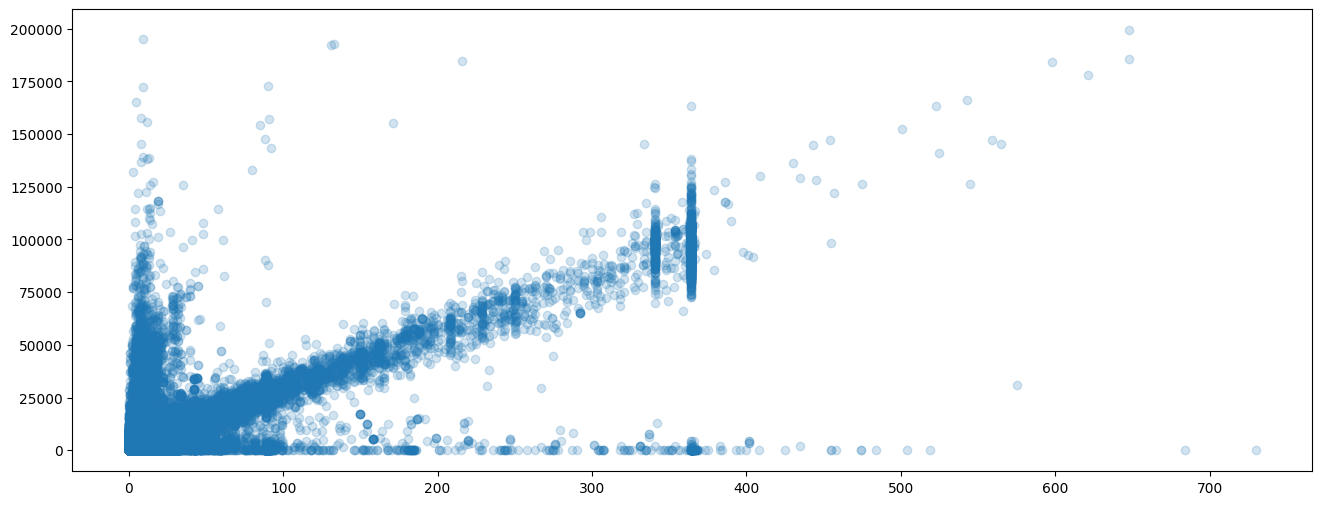

In [ ]:
# Explorando dados com gráficos

fig, ax= plt.subplots(figsize=(16,6))

ax.scatter(df_viagens["Dias de Viagem"], df_viagens["Despesas"], alpha=0.2)


# Para dar zoom no gráfico:
#ax.set_xlim(0, 100)
#ax.set_ylim(0, 25_000)

`ax.scatter()`	→ Cria um gráfico de dispersão (pontos soltos).

`df_viagens["Dias de Viagem"]` →	Eixo X: Quantos dias durou a viagem.

`df_viagens["Despesas"]` →	Eixo Y: Quanto foi gasto na viagem.

`alpha=0.2` →	Deixa os pontos com transparência (20%). Útil quando tem muitos pontos sobrepostos — fica mais fácil visualizar densidade.

In [ ]:
(df_viagens["Despesas"] > 175_000).value_counts()


,count
Despesas,
False,830871
True,8


`(df_viagens["Despesas"] > 175_000)`	 →  Cria uma série de valores True ou False
> True = viagem com despesa > 175.000 / False = o resto


`.value_counts()`	 → Conta quantos True e False tem	 → Mostra o total de viagens acima ou abaixo desse valor


In [ ]:
filtro = df_viagens["Despesas"] > 175_000
df_viagens[filtro]
#Faz um filtro na tabela, mostrando só valores maiores que 175000

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Dias de Viagem
23542,18654059,Informações p,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,-1,Sem informação,-1,Sem informação,ID094100107,Informações protegidas por sigilo,Informações protegidas por sigilo,-11,Informações protegidas por sigilo,2023-02-10,2024-09-30,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,184372.50,0.00,0.0,0.00,184372.50,598
59851,18698758,Informações p,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,-1,Sem informação,-1,Sem informação,ID214500106,Informações protegidas por sigilo,Informações protegidas por sigilo,-11,Informações protegidas por sigilo,2023-03-24,2024-12-31,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,199224.89,0.00,0.0,0.00,199224.89,648
125140,18777545,Informações p,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,-1,Sem informação,-1,Sem informação,NaN,Sem Informação,Informações protegidas por sigilo,-11,Informações protegidas por sigilo,2023-03-24,2024-12-31,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,183089.54,2539.99,0.0,0.00,185629.53,648
129280,18782567,000277/23-5C,Realizada,SIM,A autorização de afastamento foi publicada hoj...,20000,Presidência da República,20000,Presidência da República - Unidades com víncul...,***.739.980-**,LEANDRO AUGUSTO ANDERSON,NaN,CCX-0207,CCX-0207,2023-03-26,2023-08-04,"XANGAI/CHINA, São Paulo/SP",Conforme o previsto no Decreto nº 6.381 de 27 ...,174812.69,11610.06,0.0,5625.81,192048.56,131
129330,18782625,000289/23-5C,Realizada,SIM,Devido ao cancelamento da Visita Oficial do PR...,20000,Presidência da República,20000,Presidência da República - Unidades com víncul...,***.919.570-**,LUIS CARLOS MACHADO DA SILVA,NaN,CCX-0207,CCX-0207,2023-03-26,2023-08-06,"XANGAI/CHINA, São Paulo/SP",Conforme o previsto no Decreto nº 6.381 de 27 ...,175337.40,11757.14,0.0,5581.48,192676.02,133
159745,18820023,Informações p,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,-1,Sem informação,-1,Sem informação,NaN,Sem Informação,Informações protegidas por sigilo,-11,Informações protegidas por sigilo,2023-04-20,2024-12-31,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,175824.43,2097.69,0.0,0.00,177922.12,621
207458,18877982,Informações p,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,30000,Ministério da Justiça e Segurança Pública,30108,Polícia Federal,ID006200249,Informações protegidas por sigilo,Informações protegidas por sigilo,-11,Informações protegidas por sigilo,2023-06-18,2024-01-20,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,160692.47,14583.60,0.0,9511.35,184787.42,216
467853,19194886,004304/23,Realizada,SIM,Mudança de itinerário devido à situação na Fai...,35000,Ministério das Relações Exteriores,35000,Ministério das Relações Exteriores - Unidades ...,***.501.297-**,MAURO LUIZ IECKER VIEIRA,MINISTRO DE PRIMEIRA CLASSE,CNE-0001,Cargo de Natureza Especial,2023-10-06,2023-10-15,"Jacarta/Indonésia, Phnom Penh/Camboja, Nova Yo...",Visitas oficiais a países do Sudeste Asiático.,8468.86,186723.29,0.0,0.00,195192.15,9


In [ ]:
caminho_dados_passagens= '/content/drive/MyDrive/Análise de dados/2023_Passagem.csv'
df_passagens= pd.read_csv(caminho_dados_passagens, encoding= "Windows-1252", sep=";", decimal= ",")
df_passagens
#Buscando a tabela com os valores das passagens para encontrar o valor de cada passagem gasto na viagem do Ministério das Relações Exteriores

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
0,18159396,000001/23,Aéreo,Brasil,Rio de Janeiro,Rio de Janeiro,Reino Unido,NaN,Aberdeen,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,3940.94,6.31,11/08/2022,20:26
1,18159396,000001/23,Aéreo,Reino Unido,NaN,Aberdeen,Brasil,Rio de Janeiro,Rio de Janeiro,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,3940.94,6.31,11/08/2022,20:26
2,18288418,000007/23-1C,Aéreo,Brasil,Distrito Federal,Brasília,Estados Unidos da América,NaN,Nova York,Estados Unidos da América,NaN,Nova York,Brasil,Distrito Federal,Brasília,7434.13,0.00,04/11/2022,11:04
3,18302983,000001/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,9903.32,4999.78,15/09/2022,13:39
4,18306758,000002/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,9903.32,4999.78,15/09/2022,13:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389838,2023001628,Sem informaçã,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,2791.41,0.00,NaN,00:00
389839,2023001628,Sem informaçã,Aéreo,Brasil,São Paulo,São Paulo,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,1764.54,0.00,NaN,00:00
389840,2023001631,Sem informaçã,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,1985.65,0.00,NaN,00:00
389841,2023001631,Sem informaçã,Aéreo,Brasil,São Paulo,São Paulo,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,1759.88,0.00,NaN,00:00


In [ ]:
df_passagens[df_passagens["Identificador do processo de viagem"] == 19194886]
#Buscando e mostrando na tabela de passagens o identiricador do processo da viagem do Ministério de relações exteriores

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
232972,19194886,004304/23,Aéreo,Estados Unidos da América,NaN,Nova York,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,35304.33,0.0,20/11/2023,17:47
232973,19194886,004304/23,Aéreo,Indonésia,NaN,Jacarta,Camboja,NaN,Phnom Penh,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,1667.56,0.0,22/08/2023,14:53
232974,19194886,004304/23,Aéreo,Estados Unidos da América,NaN,Nova York,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,51557.43,0.0,17/10/2023,17:58
232975,19194886,004304/23,Aéreo,Camboja,NaN,Phnom Penh,CINGAPURA,NaN,CINGAPURA,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,6368.97,0.0,17/10/2023,16:33
232976,19194886,004304/23,Aéreo,Filipinas,NaN,San Juan - Metro Manila,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,7926.43,0.0,20/09/2023,11:06
232977,19194886,004304/23,Aéreo,CINGAPURA,NaN,CINGAPURA,Estados Unidos da América,NaN,Nova York,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,42368.61,0.0,17/10/2023,17:57
232978,19194886,004304/23,Aéreo,Brasil,São Paulo,São Paulo,Indonésia,NaN,Jacarta,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,41529.96,0.0,22/08/2023,14:53


In [ ]:
df_viagens.merge(df_passagens)
#Juntando as tabelas de viagens e passagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Dias de Viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
0,18159396,000001/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.000.000-**,Ekaterina Pavlovskaia,NaN,-1,Sem informação,2023-02-25,2023-03-06,Pirenópolis/GO,Segue abaixo cópia da carta-convite enviada à ...,0.00,7894.50,0.0,0.00,7894.50,9,Aéreo,Brasil,Rio de Janeiro,Rio de Janeiro,Reino Unido,NaN,Aberdeen,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,3940.94,6.31,11/08/2022,20:26
1,18159396,000001/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.000.000-**,Ekaterina Pavlovskaia,NaN,-1,Sem informação,2023-02-25,2023-03-06,Pirenópolis/GO,Segue abaixo cópia da carta-convite enviada à ...,0.00,7894.50,0.0,0.00,7894.50,9,Aéreo,Reino Unido,NaN,Aberdeen,Brasil,Rio de Janeiro,Rio de Janeiro,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,3940.94,6.31,11/08/2022,20:26
2,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,NaN,OfSuperior,OfSuperior,2023-01-10,2023-01-29,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,39565.70,7434.13,0.0,1095.35,48095.18,19,Aéreo,Brasil,Distrito Federal,Brasília,Estados Unidos da América,NaN,Nova York,Estados Unidos da América,NaN,Nova York,Brasil,Distrito Federal,Brasília,7434.13,0.00,04/11/2022,11:04
3,18302983,000001/23,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52111,Comando da Aeronáutica,***.855.388-**,GREGOR GASPAR,NaN,OfIntermed,OfIntermed,2023-01-01,2023-07-07,Gotemburgo/Suécia,PARTICIPAR DO CURSO DE PILOTO DE GRIPEN C/D.,0.00,14903.10,0.0,0.00,14903.10,187,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,9903.32,4999.78,15/09/2022,13:39
4,18306758,000002/23,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52111,Comando da Aeronáutica,***.295.391-**,VITOR LUIS MARTINS FARIA,NaN,OfIntermed,OfIntermed,2023-01-01,2023-07-07,Gotemburgo/Suécia,PARTICIPAR DO CURSO DE PILOTO DE GRIPEN C/D.,0.00,14903.10,0.0,0.00,14903.10,187,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,9903.32,4999.78,15/09/2022,13:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389846,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-07,2023-12-08,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,4555.95,0.0,0.00,5290.08,1,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,2791.41,0.00,NaN,00:00
389847,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-07,2023-12-08,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,4555.95,0.0,0.00,5

In [133]:
caminho_saida = "/content/drive/MyDrive/Análise de dados/output/tabela.xlsx"
#Criando caminho para salvar a tabela final


In [134]:
df_final.to_excel(caminho_saida) #Salvando a tabela em formato excel

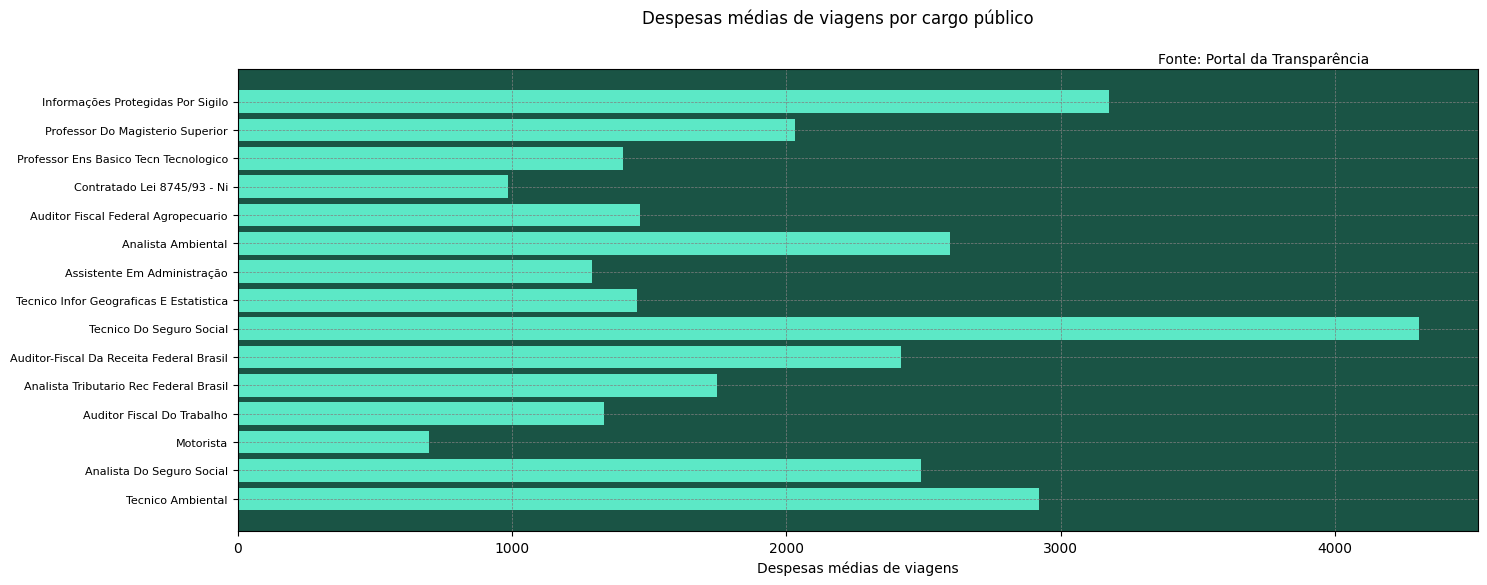

In [139]:
import matplotlib.pyplot as plt

caminho_figura = "/content/drive/MyDrive/Análise de dados/output/figura.png"
fig, ax= plt.subplots(figsize=(16, 6))

ax.barh(df_final['Cargo'], df_final["despesa_média"], color= "#5CE8C6")
ax.invert_yaxis()

ax.set_facecolor("#1A5445")

fig.suptitle("Despesas médias de viagens por cargo público")

plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.yticks(fontsize=8)

plt.figtext(0.70, 0.89, "Fonte: Portal da Transparência")

plt.xlabel("Despesas médias de viagens")

plt.savefig(caminho_figura, bbox_inches= 'tight')
#bbox_inches= 'tight' é usado para salvar a imagens sem cortes nas bordas

#Mesmo código anterior para fazer o gráfico, mas dessa vez salvando ele em uma pasta